<a href="https://colab.research.google.com/github/JoLearns/Data_Science_Notebook/blob/main/Analyzing_Historical_Stock_Revenue_Data_and_Building_a_Dashboard_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.33
    Uninstalling yfinance-0.2.33:
      Successfully uninstalled yfinance-0.2.33
/bin/bash: line 1: mamba: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.24.0 requires nbformat>=5.2.0, but you have nbformat 4.2.0 which is incompatible.
nbclient 0.9.0 requires nbformat>=5.1, but you have nbformat 4.2.0 which is incompatible.
nbconvert 6.5.4 requires nbformat>=5.1, but you have nbformat 4.2.0 which is incompatible.


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [5]:
import yfinance as yf

# Create a Ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

In [7]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Use requests to download the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

In [8]:
from bs4 import BeautifulSoup

# Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')

# Now you can use BeautifulSoup to navigate and extract information from the HTML

# For example, print the title of the webpage
print("Title:", soup.title.text)

Title: Tesla Revenue 2010-2022 | TSLA | MacroTrends


In [9]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Assuming html_data contains the HTML content
# Replace this with the actual HTML content
html_data = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm').text

# Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with Tesla Revenue
table = soup.find('table')

# Extract the data into a DataFrame
tesla_revenue = pd.read_html(str(table))[0]

# Display the DataFrame
print(tesla_revenue)

    Tesla Annual Revenue (Millions of US $)  \
0                                      2021   
1                                      2020   
2                                      2019   
3                                      2018   
4                                      2017   
5                                      2016   
6                                      2015   
7                                      2014   
8                                      2013   
9                                      2012   
10                                     2011   
11                                     2010   
12                                     2009   

   Tesla Annual Revenue (Millions of US $).1  
0                                    $53,823  
1                                    $31,536  
2                                    $24,578  
3                                    $21,461  
4                                    $11,759  
5                                     $7,000  
6           

In [10]:
# Check the column names
print(tesla_revenue.columns)

# If the column names are not exactly as expected, adjust accordingly
# For example, if the column name contains extra spaces, use:
# tesla_revenue.columns = tesla_revenue.columns.str.strip()

# Display the DataFrame to examine its structure
print(tesla_revenue)

Index(['Tesla Annual Revenue (Millions of US $)', 'Tesla Annual Revenue (Millions of US $).1'], dtype='object')
    Tesla Annual Revenue (Millions of US $)  \
0                                      2021   
1                                      2020   
2                                      2019   
3                                      2018   
4                                      2017   
5                                      2016   
6                                      2015   
7                                      2014   
8                                      2013   
9                                      2012   
10                                     2011   
11                                     2010   
12                                     2009   

   Tesla Annual Revenue (Millions of US $).1  
0                                    $53,823  
1                                    $31,536  
2                                    $24,578  
3                                    $21,

In [11]:
# Update the column names to match the actual names
tesla_revenue.columns = ['Year', 'Revenue']

# Convert the 'Revenue' column to string and replace comma and dollar sign
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(str).str.replace(',|\$',"", regex=True)

# Display the modified DataFrame
print(tesla_revenue.head())

   Year Revenue
0  2021   53823
1  2020   31536
2  2019   24578
3  2018   21461
4  2017   11759


In [12]:
print(tesla_revenue.tail())

    Year Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


In [13]:
import yfinance as yf

# Create a Ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

In [15]:
# Extract stock information with the period set to max
gme_data = gme_ticker.history(period="max")

# Reset the index in-place
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())

        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712708  1.716074  1.670626  1.683251  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [16]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Download the webpage
response = requests.get(url)

# Save the text of the response as html_data
html_data = response.text

In [17]:
from bs4 import BeautifulSoup

# Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')

# Now, 'soup' contains the parsed HTML data


In [18]:
# Using read_html
gme_tables = pd.read_html(str(soup), header=0)
gme_revenue = gme_tables[0]  # Assuming the table of interest is the first one

# Display the DataFrame to inspect the structure
print(gme_revenue)

    GameStop Annual Revenue (Millions of US $)  \
0                                         2020   
1                                         2019   
2                                         2018   
3                                         2017   
4                                         2016   
5                                         2015   
6                                         2014   
7                                         2013   
8                                         2012   
9                                         2011   
10                                        2010   
11                                        2009   
12                                        2008   
13                                        2007   
14                                        2006   
15                                        2005   

   GameStop Annual Revenue (Millions of US $).1  
0                                        $6,466  
1                                        $8,285  

In [19]:
# Update the column names to match the actual names
gme_revenue.columns = ['Year', 'Revenue']

# Convert the 'Revenue' column to string and replace comma and dollar sign
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(str).str.replace(',|\$',"", regex=True)

# Display the modified DataFrame
print(gme_revenue.head())

   Year Revenue
0  2020    6466
1  2019    8285
2  2018    8547
3  2017    7965
4  2016    9364


In [20]:
# Display the last 5 rows of the tesla_revenue DataFrame
print(gme_revenue.tail())

    Year Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  2019-06-30   $6,350
14  2019-03-31   $4,541
15  2018-12-31   $7,226
16  2018-09-30   $6,824
17  2018-06-30   $4,002
18  2018-03-31   $3,409
19  2017-12-31   $3,288
20  2017-09-30   $2,985
21  2017-06-30   $2,790
22  2017-03-31   $2,696
23  2016-12-31   $2,285
24  2016-09-30   $2,298
25  2016-06-30   $1,270
26  2016-03-31   $1,147
27  2015-12-31   $1,214
28  2015-09-30     $937
29  2015-06-30     $955
30  2015-03-31     $940
31  2014-12-31     $957
32  2014-09-30     $852
33  2014-06-30     $769
34  2014-03-31     $621
35  2013-12-31     $615
36  2013-09-30     $431
37  2013-06-30     $405
38  2013-03-31     $562
39  2012-12-31     $306
40  2012-09-30  

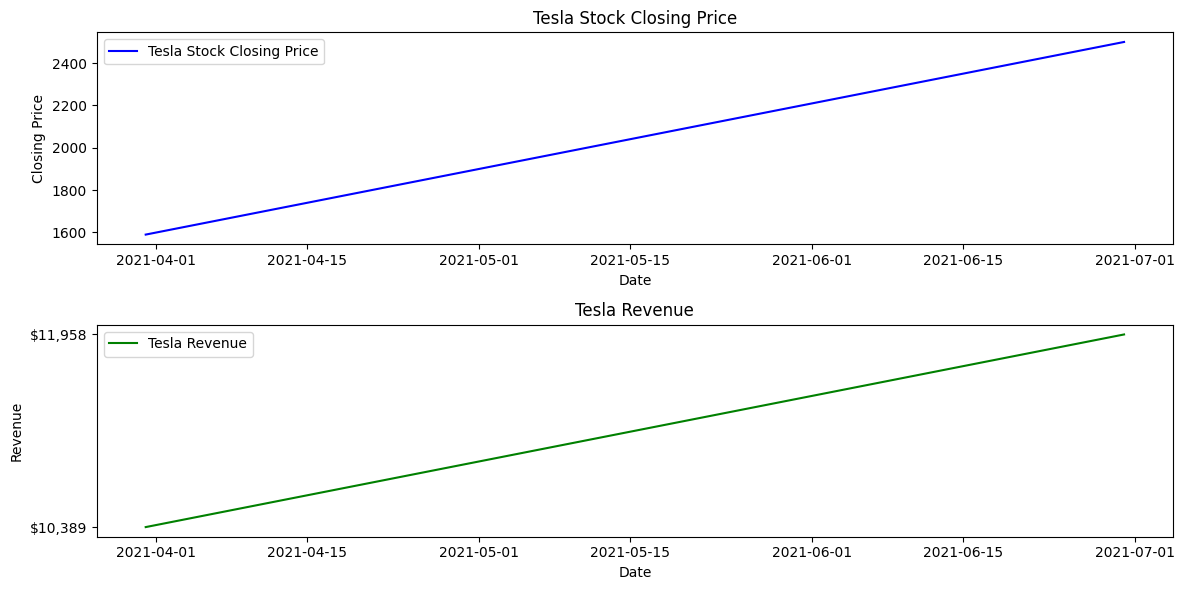

In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Use requests to download the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the second table (index 1) containing the revenue data
table = soup.find_all("tbody")[1]

# Create an empty DataFrame to store the revenue data
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Extract data from each row in the table
for row in table.find_all('tr'):
    col = row.find_all('td')
    if col:
        date = col[0].text
        revenue = col[1].text
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Display the DataFrame
print(tesla_revenue)

# Example stock data (replace this with your actual stock data)
# Ensure the length of 'Close' matches the length of 'Date'
date_range = pd.date_range(start='2021-01-01', end='2021-12-31')
close_values = [700 + i * 10 for i in range(len(date_range))]

tesla_stock_data = pd.DataFrame({
    'Date': date_range,
    'Close': close_values,
})

# Function to make a graph
def make_graph(stock_data, revenue_data, stock_name):
    # Convert the 'Date' column to datetime format
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    # Filter data up to June 2021
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']

    # Merge stock and revenue data on the 'Date' column
    merged_data = pd.merge(stock_data, revenue_data, on='Date')

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot Stock Closing Price
    plt.subplot(2, 1, 1)
    plt.plot(merged_data['Date'], merged_data['Close'], label=f'{stock_name} Stock Closing Price', color='blue')
    plt.title(f'{stock_name} Stock Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()

    # Plot Revenue
    plt.subplot(2, 1, 2)
    plt.plot(merged_data['Date'], merged_data['Revenue'], label=f'{stock_name} Revenue', color='green')
    plt.title(f'{stock_name} Revenue')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.legend()

    # Adjust layout
    plt.tight_layout()

    # Display the plot
    plt.show()

# Example usage
make_graph(tesla_stock_data, tesla_revenue, 'Tesla')







In [49]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Use requests to download the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the second table (index 1) containing the revenue data
table = soup.find_all("tbody")[1]

# Create an empty DataFrame to store the revenue data
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Extract data from each row in the table
for row in table.find_all('tr'):
    col = row.find_all('td')
    if col:
        date = col[0].text
        revenue = col[1].text
        gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Display the DataFrame
print(gme_revenue)

          Date Revenue
0   2020-04-30  $1,021
1   2020-01-31  $2,194
2   2019-10-31  $1,439
3   2019-07-31  $1,286
4   2019-04-30  $1,548
..         ...     ...
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709

[62 rows x 2 columns]


In [50]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    # Plotting stock data
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue')

    # Adding revenue data as a bar plot
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='orange')

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{title} Stock Price and Revenue')
    plt.legend()

    # Display the plot
    plt.show()

# Example usage
# make_graph(tesla_data, tesla_revenue, 'Tesla')

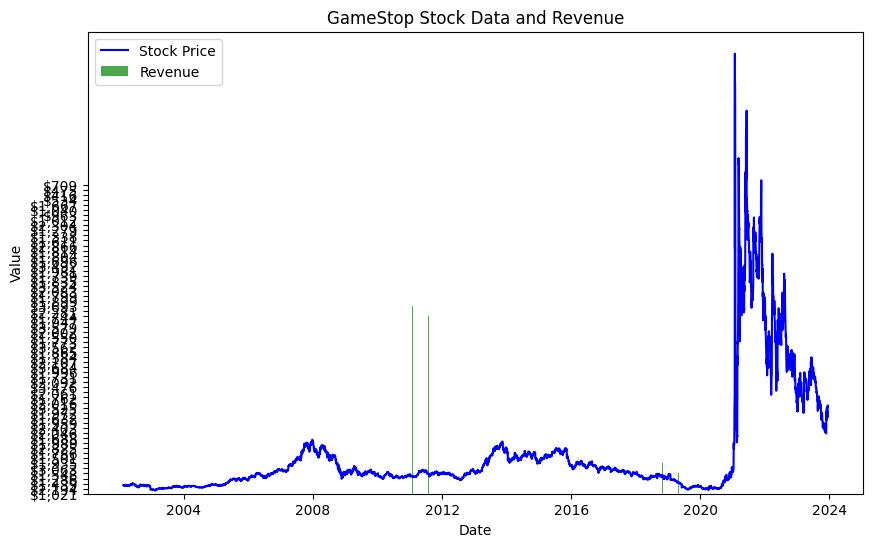

In [51]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    # Plotting stock data
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue')

    # Adding revenue data as a bar plot
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='green', alpha=0.7)

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{title} Stock Data and Revenue')
    plt.legend()
    plt.show()

# Call the make_graph function for GameStop
make_graph(gme_data, gme_revenue, 'GameStop')
